# rayoptics model of prototype

I'm going to calculate some optical properties using the rayoptics module.

In [1]:
from rayoptics.environment import *

# Create lens models

We start by defining some optical systems. For later convenience, we define each through a function which returns the model for a given distance between the lens and the image plane.


## Biconvex lens

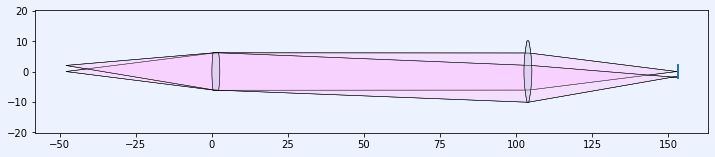

In [2]:
def biconvex_lens_system(object_distance, image_distance, separation):
    opm = OpticalModel()
    sm  = opm.seq_model
    osp = opm.optical_spec
    pm = opm.parax_model

    osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=12.5)
    osp.field_of_view = FieldSpec(osp, key=['object', 'height'], flds=[0., 2.0])
    osp.spectral_region = WvlSpec([(587.5618, 1.0), (400.5618, 1.0)], ref_wl=0)
    opm.radius_mode = True
    lens_thickness = 2.6
    lens_R = 51.1

    sm.gaps[0].thi=object_distance
    sm.add_surface([lens_R, lens_thickness, 'N-BK7', 'Schott'])
    sm.add_surface([-lens_R, separation])
    sm.set_stop()
    sm.add_surface([lens_R, lens_thickness, 'N-BK7', 'Schott'])
    sm.add_surface([-lens_R, image_distance])
    opm.update_model()
    return opm

model = biconvex_lens_system(48.0,48.0, 100.0);
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=model, do_draw_rays=True, offset_factor=100.0, do_draw_frame=True).plot()
layout_plt.set_size_inches(10,2)

## Singlet lens

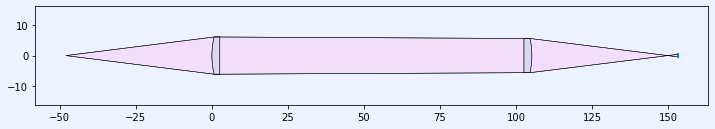

In [3]:
def singlet_lens_system(object_distance, image_distance, separation):
    opm = OpticalModel()
    sm  = opm.seq_model
    osp = opm.optical_spec
    pm = opm.parax_model

    osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=12.5)
    osp.field_of_view = FieldSpec(osp, key=['object', 'height'], flds=[0.])
    osp.spectral_region = WvlSpec([(587.5618, 1.0), (400.5618, 1.0)], ref_wl=0)
    opm.radius_mode = True
    lens_thickness = 2.6
    lens_R = 51.1/2
    sm.gaps[0].thi=object_distance
    sm.add_surface([lens_R, lens_thickness, 'N-BK7', 'Schott'])
    sm.add_surface([1e10, separation])
    sm.set_stop()
    sm.add_surface([1e10, lens_thickness, 'N-BK7', 'Schott'])
    sm.add_surface([-lens_R, object_distance])
    opm.update_model()
    return opm

model = singlet_lens_system(48.0,48.0, 100.0);
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=model, do_draw_rays=True, offset_factor=100.0, do_draw_frame=True).plot()
layout_plt.set_size_inches(10,2)

## Doublet lens

Specifically the AC127-050-A
https://www.thorlabs.com/thorproduct.cfm?partnumber=AC127-050-A

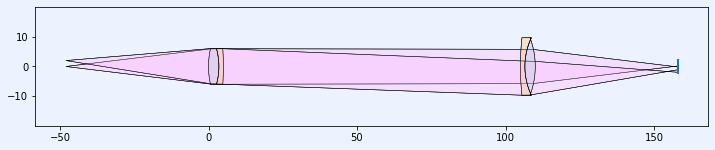

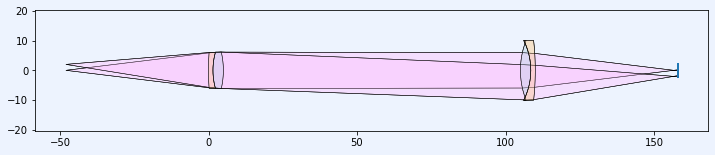

In [4]:
def doublet_lens_system(object_distance, image_distance, separation):
    opm = OpticalModel()
    sm  = opm.seq_model
    osp = opm.optical_spec
    pm = opm.parax_model

    osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=12.5)
    osp.field_of_view = FieldSpec(osp, key=['object', 'height'], flds=[0, 2.0])
    osp.spectral_region = WvlSpec([(587.5618, 1.0), (400.5618, 1.0)], ref_wl=0)

    opm.radius_mode = True

    sm.gaps[0].thi= object_distance
    sm.add_surface([27.4, 3.5, 'N-BK7', 'Schott'])
    sm.add_surface([-22.5, 1.5, 'SF2', 'Schott'])
    sm.add_surface([-91.8, separation])
    sm.set_stop()
    sm.add_surface([91.8, 1.5, 'SF2', 'Schott'])
    sm.add_surface([22.5, 3.5, 'N-BK7', 'Schott'])
    sm.add_surface([-27.4, image_distance])    
    opm.update_model()
    return opm

def doublet_lens_system_swap(object_distance, image_distance, separation):
    opm = OpticalModel()
    sm  = opm.seq_model
    osp = opm.optical_spec
    pm = opm.parax_model

    osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=12.5)
    osp.field_of_view = FieldSpec(osp, key=['object', 'height'], flds=[0, 2.0])
    osp.spectral_region = WvlSpec([(587.5618, 1.0), (400.5618, 1.0)], ref_wl=0)

    opm.radius_mode = True

    sm.gaps[0].thi= object_distance
    sm.add_surface([91.8, 1.5, 'SF2', 'Schott'])
    sm.add_surface([22.5, 3.5, 'N-BK7', 'Schott'])
    sm.add_surface([-27.4, separation])    
    sm.set_stop()
    sm.add_surface([27.4, 3.5, 'N-BK7', 'Schott'])
    sm.add_surface([-22.5, 1.5, 'SF2', 'Schott'])
    sm.add_surface([-91.8, image_distance])
    opm.update_model()
    return opm

model = doublet_lens_system(48.0, 48.0, 100.0);
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=model, do_draw_rays=True, offset_factor=100.0, do_draw_frame=True).plot()
layout_plt.set_size_inches(10,2)

model = doublet_lens_system_swap(48.0, 48.0, 100.0);
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=model, do_draw_rays=True, offset_factor=100.0, do_draw_frame=True).plot()
layout_plt.set_size_inches(10,2)

# Finding the focal distance

Now that we have defined each model, let's find the focal distance.

In [5]:
model = singlet_lens_system(60.0, 48.0, 100.0);
bf_singlet = model.optical_spec.parax_data.fod.bfl
ff_singlet = model.optical_spec.parax_data.fod.ffl
model.parax_model.first_order_data()

model = biconvex_lens_system(48.0, 48.0, 100.0);
bf_biconvex = model.optical_spec.parax_data.fod.bfl
ff_biconvex = model.optical_spec.parax_data.fod.ffl
model.parax_model.first_order_data()

model = doublet_lens_system(48.0, 48.0, 100.0);
bf_doublet = model.optical_spec.parax_data.fod.bfl
ff_doublet = model.optical_spec.parax_data.fod.ffl
model.parax_model.first_order_data()

efl              -537.1
ffl              -586.6
pp1               -1124
bfl               586.6
ppk               -1124
f/#               5.041
m               -0.9803
red             -0.9803
obj_dist             60
obj_ang          0.9274
enp_dist          1.776
enp_radius         6.25
na obj           0.1007
n obj                 1
img_dist             60
img_ht             1.02
exp_dist           96.2
exp_radius        5.706
na img          -0.0987
n img                 1
optical invariant       0.1012
efl               -1252
ffl               -1301
pp1               -2553
bfl                1301
ppk               -2553
f/#               3.976
m                -1.001
red              -1.001
obj_dist             48
obj_ang           2.302
enp_dist          1.744
enp_radius         6.25
na obj           0.1247
n obj                 1
img_dist             48
img_ht            1.998
exp_dist          97.78
exp_radius        6.006
na img          -0.1248
n img                 1
optical i

# Compare transverse abberations

Plot the transverse abberations at the focal point of each system.

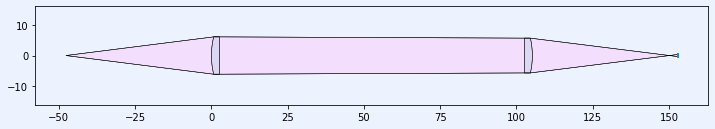

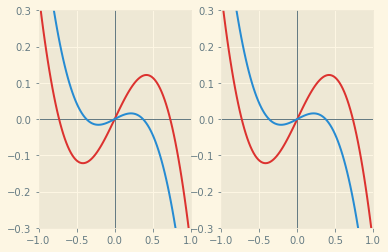

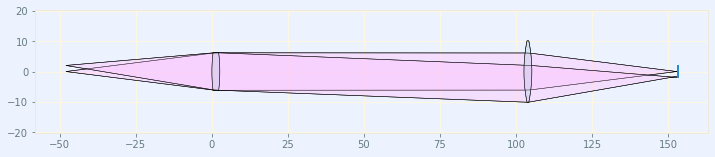

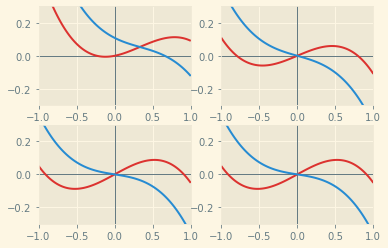

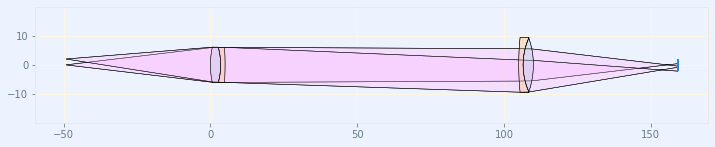

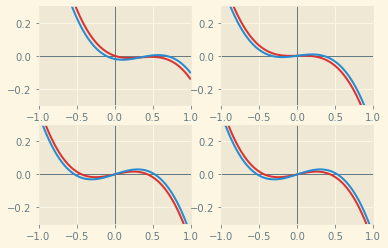

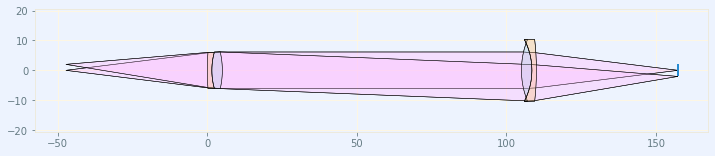

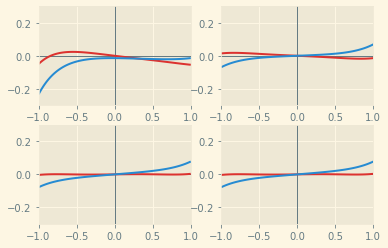

In [6]:
def set_limits(fig):
    for ax in fig.get_axes():
        ax.set_ylim(-0.3,0.3)
    return fig

f_singlet = 47.7
model = singlet_lens_system(f_singlet, f_singlet, 100.0);
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=model, do_draw_rays=True, offset_factor=100.0, do_draw_frame=True).plot().set_size_inches(10,2)
p_singlet = set_limits(plt.figure(FigureClass=RayFanFigure, opt_model=model, data_type='Ray', scale_type=Fit.All_Same).plot())

f_biconvex = 48
model = biconvex_lens_system(f_biconvex, f_biconvex, 100.0);
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=model, do_draw_rays=True, offset_factor=100.0, do_draw_frame=True).plot().set_size_inches(10,2)
p_biconvex = set_limits(plt.figure(FigureClass=RayFanFigure, opt_model=model, data_type='Ray', scale_type=Fit.All_Same).plot())

f_doublet = 48.08
f_doublet = 47.2+2
model = doublet_lens_system(f_doublet, f_doublet, 100.0);
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=model, do_draw_rays=True, offset_factor=100.0, do_draw_frame=True).plot().set_size_inches(10,2)
p_doublet = set_limits(plt.figure(FigureClass=RayFanFigure, opt_model=model, data_type='Ray', scale_type=Fit.All_Same).plot())

f_doublet_swap = 47.29
model = doublet_lens_system_swap(f_doublet_swap, f_doublet_swap, 100.0);
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=model, do_draw_rays=True, offset_factor=100.0, do_draw_frame=True).plot().set_size_inches(10,2)
p_doublet = set_limits(plt.figure(FigureClass=RayFanFigure, opt_model=model, data_type='Ray', scale_type=Fit.All_Same).plot())

# Plot the wavefront abberation

In [7]:
#model = singlet_lens_system(f_singlet, f_singlet, 100.0);
#p_singlet = plt.figure(FigureClass=RayFanFigure, opt_model=model, data_type='OPD', scale_type=Fit.All_Same).plot()

#model = biconvex_lens_system(f_biconvex, f_biconvex, 100.0);
#p_biconvex = plt.figure(FigureClass=RayFanFigure, opt_model=model, data_type='OPD').plot()

#model = doublet_lens_system_swap(f_doublet_swap, f_doublet_swap, 100.0);
#p_doublet = plt.figure(FigureClass=RayFanFigure, opt_model=model, data_type='OPD').plot()

# Spot Diagram

Compare the spot diagrams for each system.

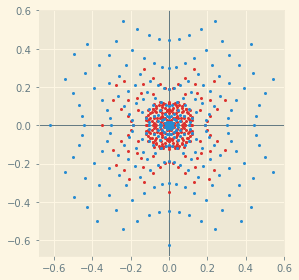

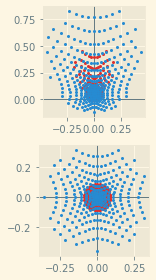

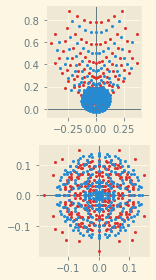

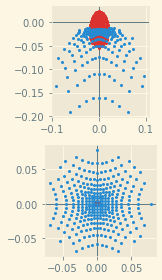

In [8]:
f_singlet = 47.7
model = singlet_lens_system(f_singlet, f_singlet, 100.0);
p_doublet = plt.figure(FigureClass=SpotDiagramFigure, opt_model=model).plot()

f_biconvex = 48
model = biconvex_lens_system(f_biconvex, f_biconvex, 100.0);
p_doublet = plt.figure(FigureClass=SpotDiagramFigure, opt_model=model).plot()

f_doublet = 48.08
model = doublet_lens_system(f_doublet, f_doublet, 100.0);
p_doublet = plt.figure(FigureClass=SpotDiagramFigure, opt_model=model).plot()

f_doublet_swap = 47.29
model = doublet_lens_system_swap(f_doublet_swap, f_doublet_swap, 100.0);
p_doublet = plt.figure(FigureClass=SpotDiagramFigure, opt_model=model).plot()

# First-order data

For a description of properties, see source at
https://github.com/mjhoptics/ray-optics/blob/834fd2cecc06e6a60ef4df9d28a0c23fdaa1435d/src/rayoptics/optical/firstorder.py

In [11]:
model = doublet_lens_system(f_doublet, f_doublet, 100);
f_singlet = model.optical_spec.parax_data.fod.bfl
model.parax_model.first_order_data()

efl                -467
ffl              -516.7
pp1              -983.7
bfl               516.7
ppk              -983.7
f/#               4.106
m                -1.003
red              -1.003
obj_dist          48.08
obj_ang           2.224
enp_dist           3.42
enp_radius         6.25
na obj           0.1205
n obj                 1
img_dist          48.08
img_ht            1.993
exp_dist          97.27
exp_radius        5.612
na img          -0.1209
n img                 1
optical invariant       0.2427
